<a href="https://colab.research.google.com/github/tmtakashi/RNN_practice/blob/master/lstm_apple_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('drive/My Drive/Colab Notebooks/DeepLearningAtoZ/RNN/apple_stock_price.csv')
data = data.iloc[::-1] # Reverse the order
data = data.iloc[:, 3:4].values

# Split to train data and test data
data_train = data[20:]
data_test = data[:20] 

In [0]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
data_train_scaled = sc.fit_transform(data_train)

In [0]:
x_train, y_train = [], []

for i in range(60, 1241):
  x_train.append(data_train_scaled[i-60 : i, 0])
  y_train.append(data_train_scaled[i, 0])
  
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

regressor = Sequential()

# First LSTM layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
              
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))              

# Fourth LSTM layer
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.2))
              
# Output layer
regressor.add(Dense(1))
              
# Compile model
regressor.compile(optimizer='adam', loss='mean_squared_error')
              
regressor.fit(x_train, y_train, epochs=100, batch_size=32)   

In [0]:
regressor_json = regressor.to_json()
with open("drive/My Drive/Colab Notebooks/DeepLearningAtoZ/RNN/regressor_apple.json", "w") as json_file:
    json_file.write(regressor_json)

regressor.save_weights("drive/My Drive/Colab Notebooks/DeepLearningAtoZ/RNN/regressor_apple.h5")

In [0]:
# Inputs for prediction
inputs = data[len(data) - len(data_test) - 60:]
inputs = inputs.reshape(-1, 1)

inputs = sc.transform(inputs)

In [0]:
x_test = []
for i in range(60, 80):
  x_test.append(inputs[i-60 : i, 0])
  
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
predicted_stock_price = regressor.predict(x_train)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

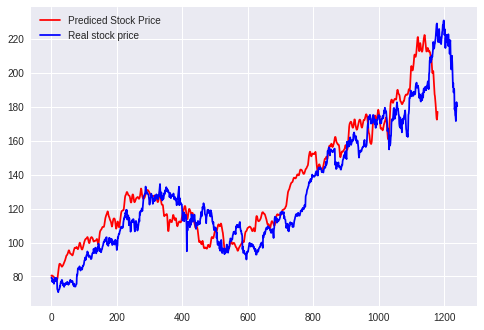

In [55]:
plt.plot(predicted_stock_price, color='red', label='Prediced Stock Price')
plt.plot(data_train, color='blue', label='Real stock price')
plt.legend()
plt.show()